In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
salary = pd.read_csv(r'Position_Salaries.csv')
x = salary.iloc[:, 1:-1].values
y = salary.iloc[:, -1].values

In [3]:
y = y.reshape(len(y), 1)  # as scaler object take 2d list

In [4]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

WE HAVE TO FEATURE SCALE BOTH X AND Y UNLESS SUPPORT VECTOR MAY NOT WORK


In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
scaled_x = sc_x.fit_transform(x)

sc_y = StandardScaler()
# sc_x have standard dev and mean of x thus we can not scale y beacause it have different std and mean
scaled_y = sc_y.fit_transform(y)

In [6]:
from sklearn.svm import SVR

svr_regressor = SVR()

svr_regressor.fit(scaled_x, scaled_y)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [7]:
# everything here takes 2d array
sc_y.inverse_transform([svr_regressor.predict(sc_x.transform([[6.5]]))])

array([[170370.0204065]])

Text(0.5, 1.0, 'position vs salary')

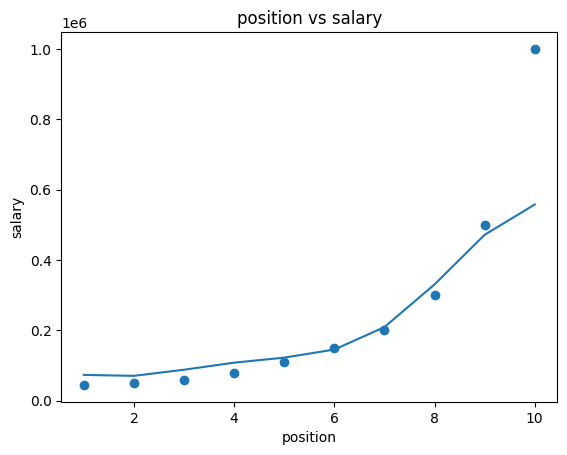

In [8]:
# visualization

plt.scatter(x, y)
plt.plot(x, sc_y.inverse_transform(
    (svr_regressor.predict(scaled_x).reshape(-1, 1))))
plt.xlabel('position')
plt.ylabel('salary')
plt.title('position vs salary')

In [9]:
x_grid = np.arange(min(x), max(x), step=.1)
x_grid
# creating values of x

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6652\861118480.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), step=.1)


array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [10]:
# making it a column vector as regressor and other fun take column vector
x_grid = x_grid.reshape(-1, 1)

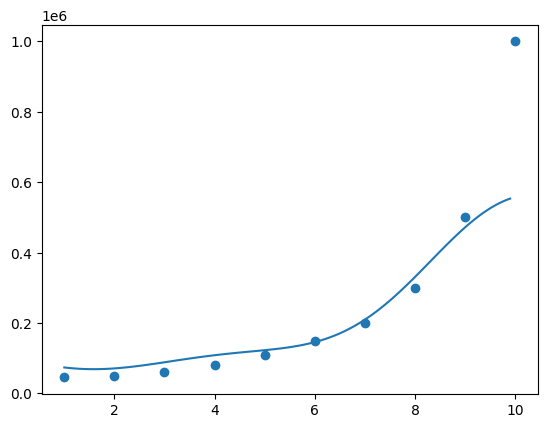

In [12]:
plt.scatter(x, y)
plt.plot(x_grid, sc_y.inverse_transform(
    svr_regressor.predict(sc_x.transform(x_grid)).reshape(-1, 1)))

# for all value of x_grid we first scaled it and then predict with our model